# Sources

- [Linear Regression in Machine learning](https://www.geeksforgeeks.org/ml-linear-regression/)
- [Your First Linear Regression Project in Python](https://www.youtube.com/watch?v=2xkXL5EUpS0&list=PLlrxD0HtieHjNnGcZ1TWzPjKYWgfXSiWG&index=9&ab_channel=MicrosoftDeveloper)
- Very good, must read: [An introduction to gradient descent and backpropagation](https://towardsdatascience.com/an-introduction-to-gradient-descent-and-backpropagation-81648bdb19b2)

## Explanation

- Given a data set contains the house price (`yi`) and the year (`xi`). Now, we have to predict the house price in the near future.
    - the house price is a dependent variable (it depends on the year): `y`
    - the year is an independent variable (it doesn't depend on any thing): `x`

- We predict the relationship between x & y is a line: `y = b0 + b1x` (hypothesis function), where
    - b0 is the intercept
    - b1 is the slope of the line

- The goal is to find the best fit line equation (meaning to find b0 & b1), so that this line is the closest to the data set.
- The cost function (or loss function): `f(b0, b1) = 1/n * sum(1..n) (yi' - yi)^2`, where
    - f(b0, b1) is the error between the predicted & actual values should be kept to a minimum.
    - yi' is the actual value at xi
    - yi is the predicted value at xi

- The gradient descent of the cost function:
    - `gd_b0 = 2/n * sum(1..n) * (yi' - yi)`
    - `gd_b1 = 2/n * sum(1..n) * (yi' - yi) * xi`


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Print the shape of the data and the first row
print(X.shape)
print(X[0])
print(y[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
151.0


In [13]:
# Extract the column at index 2
X = X[:, 2] # BMI column

# Reshape to a 2D array
X = X.reshape(-1, 1) # [ [X[0]], [X[1]], .... , [X[n]] ]

# Split the data into training and testing data
# test data = 33%
# train data = 67%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

# Create a linear regression model and train it with our data
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predict using our test data
y_pred = model.predict(X_test)

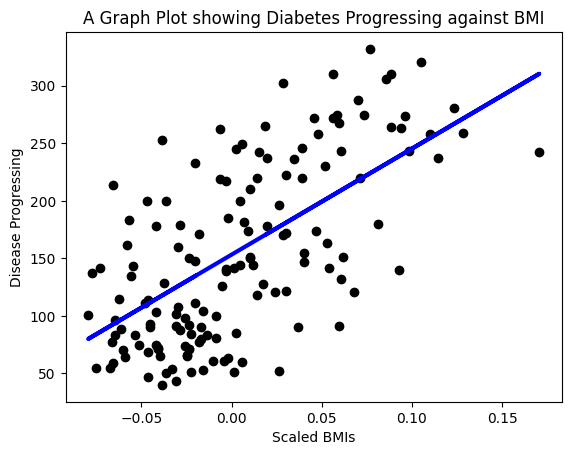

In [17]:
# Create a scatter plot
plt.scatter(X_test, y_test, color='black')

# Plot the prediction
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Add labels and a title
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progressing')
plt.title('A Graph Plot showing Diabetes Progressing against BMI')

# Draw the plot
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error in an easy to read format
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean error: 58.6 (37.4%)


In [21]:
# Calculate the coefficient of determination
score = model.score(X_train, y_train)
print('Model determination: ', score)

# Print the slope and the interception
print(f"y = {model.coef_[0]}x + {model.intercept_}")

Model determination:  0.30079683770795773
y = 921.2909434769126x + 153.20933829879073
